# 2.1 System_discretization

In [1]:
import numpy as np
from scipy.linalg import expm, inv
from scipy.signal import cont2discrete, dlti, dstep, StateSpace, step
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 构建系统矩阵
A = np.array([[0., 1.],
              [ -2., -3.]])
# 构建输出矩阵
B = np.array([[0.], 
              [1.]])

# 构建输出矩阵和直接传递矩阵
C = np.array([[1., 0.]])
D = np.array([[0.]])

In [3]:
# 定义两组采样时间
Ts_1 = 0.2
Ts_2 = 1.

In [4]:
# 根据公式计算
Fd_1 = expm(A * Ts_1)
Gd_1 = inv(A).dot(Fd_1 - np.eye(A.shape[0])).dot(B)
Fd_2 = expm(A * Ts_2)
Gd_2 = inv(A).dot(Fd_2 - np.eye(A.shape[0])).dot(B)

(Fd_1, Gd_1), (Fd_2, Gd_2)

((array([[ 0.96714146,  0.14841071],
         [-0.29682141,  0.52190934]]),
  array([[0.01642927],
         [0.14841071]])),
 (array([[ 0.6004236 ,  0.23254416],
         [-0.46508832, -0.09720887]]),
  array([[0.1997882 ],
         [0.23254416]])))

In [5]:
# 连续系统转离散系统
sys_d_1 = cont2discrete((A, B, C, D), Ts_1)
sys_d_2 = cont2discrete((A, B, C, D), Ts_2)

(sys_d_1, sys_d_2)

((array([[ 0.96714146,  0.14841071],
         [-0.29682141,  0.52190934]]),
  array([[0.01642927],
         [0.14841071]]),
  array([[1., 0.]]),
  array([[0.]]),
  0.2),
 (array([[ 0.6004236 ,  0.23254416],
         [-0.46508832, -0.09720887]]),
  array([[0.1997882 ],
         [0.23254416]]),
  array([[1., 0.]]),
  array([[0.]]),
  1.0))

In [6]:
# 连续系统的单位阶跃响应
sys_cont = StateSpace(A, B, C, D)
t_continuous = np.linspace(0, 10, 1000)
t_cont, y_cont = step(sys_cont, T=t_continuous)

In [7]:
# 两组不同采样时间的离散系统的单位阶跃响应
t_d_1, y_d_1 = dstep(sys_d_1)
y_d_1 = y_d_1[0].squeeze()

t_d_2, y_d_2 = dstep(sys_d_2)
y_d_2 = y_d_2[0].squeeze()

t_cont.shape, t_d_1.shape, t_d_2.shape

((1000,), (100,), (100,))

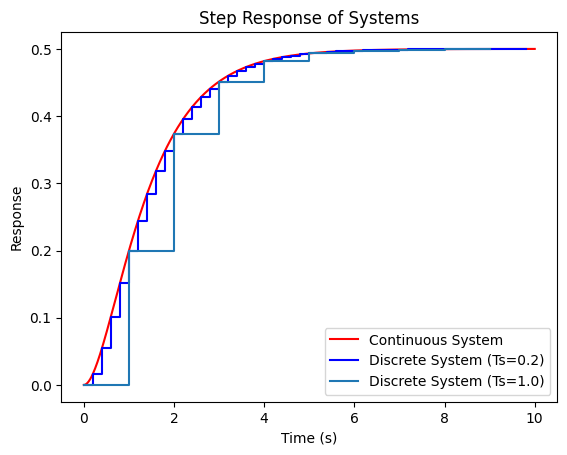

In [8]:
plt.plot(t_cont, y_cont, 'r', label='Continuous System')
# 50 = 10(s) / Ts_1
plt.step(t_d_1[:50], y_d_1[:50], 'b', label=f'Discrete System (Ts={Ts_1})', where='post')
# 10 = 10(s) / Ts_2
plt.step(t_d_2[:10], y_d_2[:10], label=f'Discrete System (Ts={Ts_2})', where='post')

plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step Response of Systems')
plt.legend()
plt.show()

# 2.2 Linear_regression

In [9]:
# 定义z向量
z = np.array([183., 175., 187., 185., 176., 176., 185., 191., 195., 185., 174., 180., 178., 170., 184.])
# 定义x向量
x = np.array([75., 71., 83., 74., 73., 67., 79., 73., 88., 80., 81., 78., 73., 68., 71.])
# 扩展x向量
x = np.column_stack((np.ones(len(x)), x))

In [10]:
# 求解最优y
y = np.linalg.inv(x.T.dot(x)).dot(x.T.dot(z))

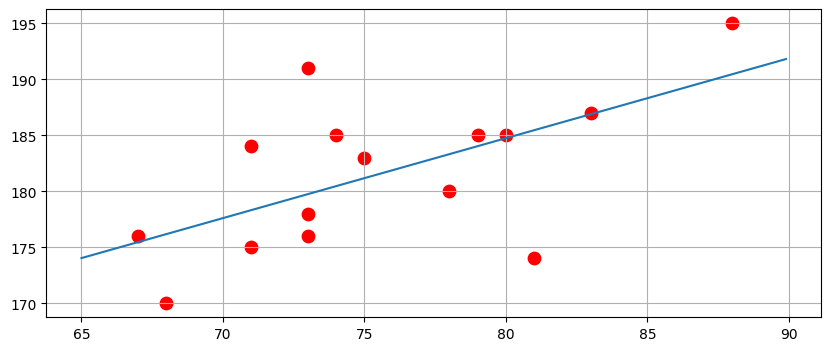

In [11]:
# 结果的可视化
plt.figure(figsize=(10, 4))
# 定义横坐标
x_draw = np.arange(65, 90, 0.1)
# 散点图
plt.scatter(x[:, 1], z, 80, color="r")
# 线型图
plt.plot(x_draw, y[1]*x_draw + y[0])
plt.grid(True)
plt.show()

# 2.3 Linear_regression_gradient_descent

In [12]:
# 定义z向量
z = np.array([183., 175., 187., 185., 176., 176., 185., 191., 195., 185., 174., 180., 178., 170., 184.]).reshape(-1, 1)
# 定义x向量
x = np.array([75., 71., 83., 74., 73., 67., 79., 73., 88., 80., 81., 78., 73., 68., 71.]).reshape(-1, 1)
# 扩展x向量
x = np.hstack((np.ones_like(x), x))
# 定义y向量
y = np.array([120, 1]).reshape(-1, 1)

In [13]:
# 定义学习率
alpha = np.array([[0.001, 0.], [0., 0.00001]])
# 定义停止条件阈值，用于判断系统是否到达稳态
tol = 1e-4
# 初始化函数变化
diff = np.inf
# 定义迭代次数
i = 0
# 定义最大迭代次数，用于限制程序运行时间
max_iter = 100000

f_y_pre = z.T.dot(z) - 2 * z.T.dot(x).dot(y) + y.T.dot(x.T).dot(x).dot(y)

In [14]:
while diff > tol:
    # 更新y
    gradient = x.T.dot(x.dot(y) - z)
    y = y - alpha.dot(gradient)
    # 计算当前f_y
    f_y = z.T.dot(z) - 2 * z.T.dot(x).dot(y) + y.T.dot(x.T).dot(x).dot(y)
    # 计算两次迭代后y的变化
    diff = np.abs(f_y - f_y_pre)
    # 保存上一次f_y
    f_y_pre = f_y
    # 更新迭代次数
    i += 1
    # 如程序超过预设最大迭代步，则报错
    if i > max_iter:
        raise ValueError('Maximum Number of Iterations Exceeded')

    # 输出进度（可选）
    if i % 1000 == 0:
        print(f'Iteration {i}, function difference: {diff[0, 0]}')

Iteration 1000, function difference: 0.0006999479373916984
Iteration 2000, function difference: 0.0005956572713330388
Iteration 3000, function difference: 0.0005069058388471603
Iteration 4000, function difference: 0.0004313780227676034
Iteration 5000, function difference: 0.00036710372660309076
Iteration 6000, function difference: 0.0003124061622656882
Iteration 7000, function difference: 0.0002658583107404411
Iteration 8000, function difference: 0.00022624607663601637
Iteration 9000, function difference: 0.0001925358665175736
Iteration 10000, function difference: 0.0001638486864976585
Iteration 11000, function difference: 0.00013943557860329747
Iteration 12000, function difference: 0.00011865992564707994
Iteration 13000, function difference: 0.00010097987251356244


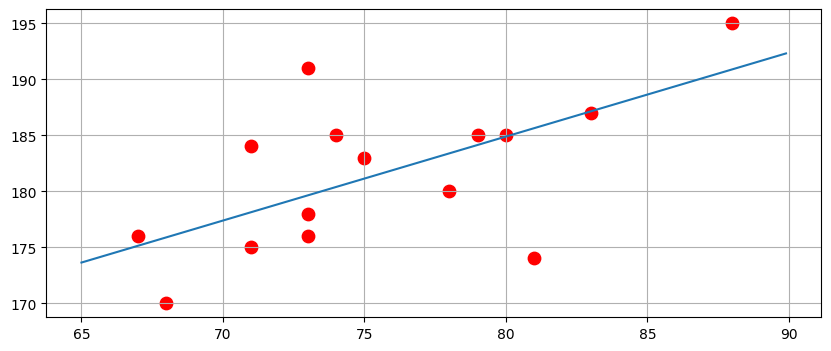

In [15]:
# 结果的可视化
plt.figure(figsize=(10, 4))
# 定义横坐标
x_draw = np.arange(65, 90, 0.1)
# 散点图
plt.scatter(x[:, 1], z.ravel(), 80, color="r")
# 线型图
plt.plot(x_draw, y[1] * x_draw + y[0])
plt.grid(True)
plt.show()